In [166]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.10.1
1.21.6


In [167]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [168]:
from PIL import Image
import glob

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.Resampling.LANCZOS) 
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

image_dir_path = ("./rock_scissor_paper_ver2/scissor")
resize_images(image_dir_path)

image_dir_path = ("./rock_scissor_paper_ver2/rock")
resize_images(image_dir_path)

image_dir_path = ("./rock_scissor_paper_ver2/paper")
resize_images(image_dir_path)

300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.


In [169]:
import numpy as np

def load_data(img_path, number_of_data=900):  
    img_size = 28
    color = 3
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 0
        idx += 1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 1
        idx += 1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 2
        idx += 1

    print("학습데이터의 실제 이미지 개수:", idx)
    return imgs[:idx], labels[:idx]   # ✅ 여기서 실제 개수만 반환

image_dir_path = "./rock_scissor_paper_ver2"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터의 실제 이미지 개수: 900
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)


라벨:  0


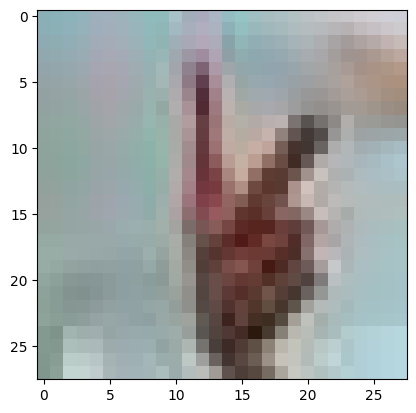

In [170]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [171]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1 = 32
n_channel_2 = 64
n_channel_3 = 128
n_dense1 = 128
n_dense2 = 64
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense1, activation='relu'))
model.add(keras.layers.Dropout(0.4))        # 과적합 방지
model.add(keras.layers.Dense(n_dense2, activation='relu'))
model.add(keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 1, 1, 128)      

In [172]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/20
29/29 [==============================] - 0s 8ms/step - loss: 1.0614 - accuracy: 0.4322
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.6668 - accuracy: 0.7567
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2595 - accuracy: 0.9122
Epoch 4/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1607 - accuracy: 0.9433
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1352 - accuracy: 0.9556
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0576 - accuracy: 0.9833
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0268 - accuracy: 0.9933
Epoch 8/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0250 - accuracy: 0.9900
Epoch 9/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0170 - accuracy: 0.9978
Epoch 10/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0086 - accuracy: 0.9978
Epoch 11/20
29/29 [

In [173]:
# TEST

image_dir_path = "./rock_scissor_paper/test"
(x_test, y_test) = load_data(image_dir_path, number_of_data=300)  
x_test_norm = x_test / 255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터의 실제 이미지 개수: 300
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [174]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 3.0171 - accuracy: 0.5300 - 94ms/epoch - 9ms/step
test_loss: 3.0170724391937256 
test_accuracy: 0.5299999713897705
